In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
def evaluate_knn(X, y, scale_type='none', k=5):
    if scale_type == 'minmax':
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
    elif scale_type == 'zscore':
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X.copy() 

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc, X_scaled

In [3]:
k = 5
scales = ['none', 'minmax', 'zscore']
results = {}

for s in scales:
    acc, _ = evaluate_knn(X, y, scale_type=s, k=k)
    results[s] = acc

print("KNN Accuracy Comparison:-")
for method, acc in results.items():
    print(f"{method.capitalize():<10}: {acc:.4f}")

KNN Accuracy Comparison:-
None      : 1.0000
Minmax    : 1.0000
Zscore    : 1.0000


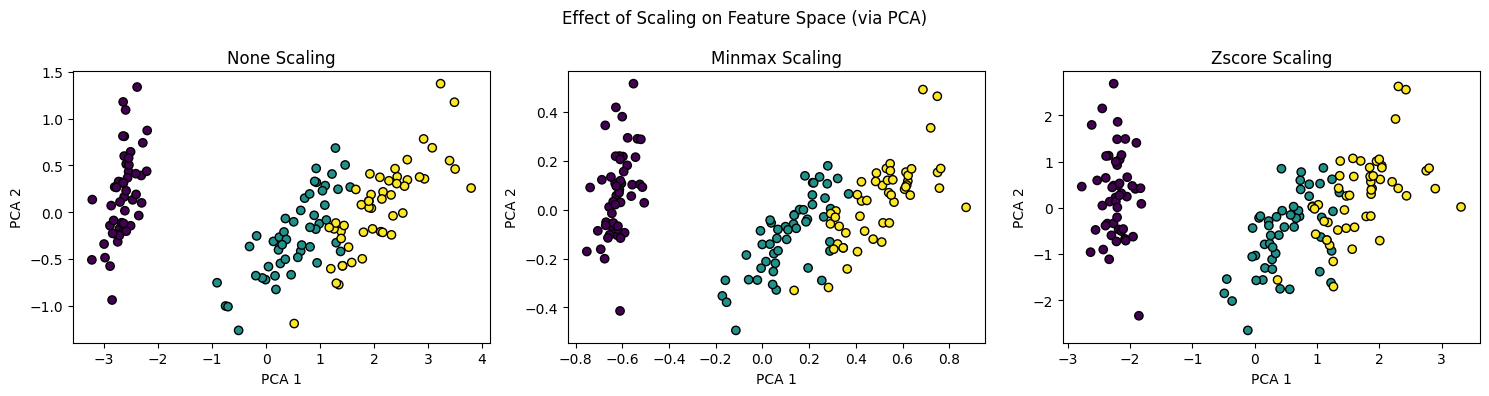

In [4]:
pca = PCA(n_components=2)

plt.figure(figsize=(15, 4))

for i, scale in enumerate(scales):
    _, X_scaled = evaluate_knn(X, y, scale_type=scale, k=k)
    X_2d = pca.fit_transform(X_scaled)
    plt.subplot(1, 3, i+1)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.title(f"{scale.capitalize()} Scaling")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

plt.suptitle("Effect of Scaling on Feature Space (via PCA)")
plt.tight_layout()
plt.show()
